In [63]:
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
import os, glob, pickle
import seaborn as sns
import soundfile as sf 
from sklearn.model_selection import train_test_split
from pydub import AudioSegment
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score

In [2]:
VERBO = 'VERBO/'
dir_list = os.listdir('VERBO')
dir_list.pop(6)

'features'

In [3]:
emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(VERBO + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(part[0])
        temp = part[1]
        if temp == "f1" or temp =='f2' or temp == 'f3' or temp == 'f4' or temp == 'f5' or temp == 'f6':
            temp = "feminino"
        else:
            temp = "masculino"
        gender.append(temp)
        path.append(VERBO + i + '/' + f)

        
VERBO_df = pd.DataFrame(emotion)
VERBO_df = VERBO_df.replace({'neu':'neutro', 'des':'desgosto', 'ale':'alegre', 'tri':'triste', 'rai':'raiva', 'med':'medo', 'sur':'surpresa'})
VERBO_df = pd.concat([pd.DataFrame(gender),VERBO_df],axis=1)
VERBO_df.columns = ['gender','emotion']
VERBO_df['labels'] = VERBO_df.gender + '_' + VERBO_df.emotion
VERBO_df['source'] = 'VERBO'  
VERBO_df = pd.concat([VERBO_df,pd.DataFrame(path, columns = ['path'])],axis=1)
#VERBO_df = VERBO_df.drop(['gender', 'emotion'], axis=1)
#VERBO_df.labels.value_counts()
VERBO_df

,gender,emotion,labels,source,path
0,feminino,alegre,feminino_alegre,VERBO,VERBO/f1/ale-f1-l1.wav
1,feminino,alegre,feminino_alegre,VERBO,VERBO/f1/ale-f1-l2.wav
2,feminino,alegre,feminino_alegre,VERBO,VERBO/f1/ale-f1-l3.wav
3,feminino,alegre,feminino_alegre,VERBO,VERBO/f1/ale-f1-l4.wav
4,feminino,alegre,feminino_alegre,VERBO,VERBO/f1/ale-f1-l5.wav
5,feminino,alegre,feminino_alegre,VERBO,VERBO/f1/ale-f1-ns1.wav
6,feminino,alegre,feminino_alegre,VERBO,VERBO/f1/ale-f1-ns2.wav
7,feminino,alegre,feminino_alegre,VERBO,VERBO/f1/ale-f1-ns3.wav
8,feminino,alegre,feminino_alegre,VERBO,VERBO/f1/ale-f1-ns4.wav
9,feminino,alegre,feminino_alegre,VERBO,VERBO/f1/ale-f1-ns5.wav


In [4]:
#contando a quantidade de arquivos por genero_emoção
VERBO_df.labels.value_counts()

masculino_triste      85
masculino_raiva       84
masculino_desgosto    84
masculino_surpresa    84
masculino_neutro      84
feminino_neutro       83
masculino_medo        83
feminino_medo         83
feminino_triste       83
feminino_raiva        83
feminino_desgosto     83
feminino_alegre       83
feminino_surpresa     83
masculino_alegre      83
Name: labels, dtype: int64

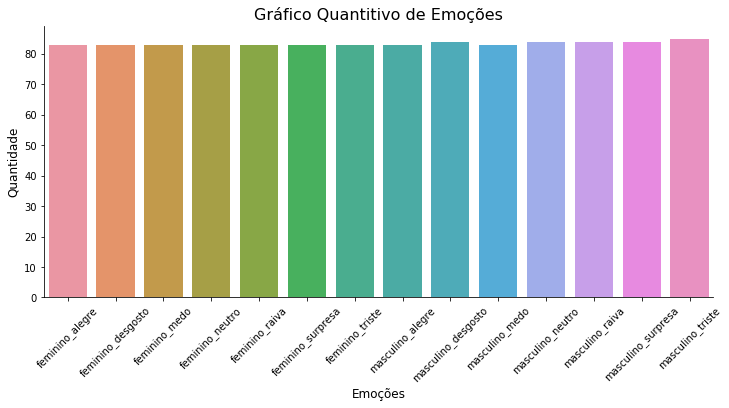

In [5]:
#gerando gráfico quantitativo
plt.figure(figsize=(12, 5))
plt.title('Gráfico Quantitivo de Emoções', size=16)
sns.countplot(VERBO_df.labels)
plt.ylabel('Quantidade', size=12)
plt.xlabel('Emoções', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [14]:
def audio_features(file_title, mfcc, chroma, mel):
    with sf.SoundFile(file_title) as audio_recording:
        audio = audio_recording.read(dtype="float32")
        sample_rate = audio_recording.samplerate        
        if chroma:
            stft=np.abs(librosa.stft(audio))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(audio, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [17]:
#capture os audios que não estão rodando a features
def localizando_audios_para_ajuste():    
    lista_audio_ajuste = []
    for file in VERBO_df['path']:             
        try:
            feature = audio_features(str(file), mfcc=True, chroma=True, mel=True)  
            print(f"Sucesso: {file} ")
        except:       
            print(f"Falha: {file} ")
            print(f"adicionando a lista de ajustes")
            lista_audio_ajuste.append(file)
    return lista_audio_ajuste

In [72]:
lista_ajustes = localizando_audios_para_ajuste()

In [58]:
# faça a limpeza dos nomes dos arquivos e depois converta para um canal fazend o ajuste
qtd_audios = len(lista_ajustes)
qtd_audios
lista_path = []
for file in range(qtd_audios):
    lista_path.append(lista_ajustes[file].split('VERBO/')[1])

for file in lista_path:
    sound = AudioSegment.from_wav("VERBO/f2/sur-f2-l2.wav")
    sound = sound.set_channels(1)
    sound.export("VERBO_AJUSTE/"+file, format="wav")   


In [59]:
#capture os audios que não estão rodando a features
def loading_audio_data():
    x = []
    y = []
    for file in VERBO_df['path']:        
        emotion = file.split('/')[2].split('-')[0]             
        feature = audio_features(str(file), mfcc=True, chroma=True, mel=True)
        
        x.append(feature)   
        y.append(emotion)


    final_dataset = train_test_split(np.array(x), y, test_size=0.1, random_state=9)
    return  final_dataset

In [61]:
X_train, X_test, y_train, y_test = loading_audio_data()

In [66]:
model = MLPClassifier(hidden_layer_sizes=(200,), learning_rate='adaptive', max_iter=400)

In [70]:
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(200,), learning_rate='adaptive', max_iter=400)

In [71]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy of the Recognizer is: {:.1f}%".format(accuracy*100))

Accuracy of the Recognizer is: 62.4%
